In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
train_df=pd.read_csv("D:\\machine learning projecsts folders\\realstate\\gurgoan clean data.csv")

In [4]:
train_df.isnull().sum()

property_type         1
society             488
sector                0
price                19
rate                 19
area                 19
areaWithType          1
bedRoom               1
bathroom              1
balcony               1
additionalRoom        1
noOfFloor            20
facing             1106
agePossession         2
nearbyLocations     178
furnishDetails      982
features            636
dtype: int64

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3804 entries, 0 to 3803
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   property_type    3803 non-null   object 
 1   society          3316 non-null   object 
 2   sector           3804 non-null   object 
 3   price            3785 non-null   float64
 4   rate             3785 non-null   float64
 5   area             3785 non-null   float64
 6   areaWithType     3803 non-null   object 
 7   bedRoom          3803 non-null   float64
 8   bathroom         3803 non-null   float64
 9   balcony          3803 non-null   object 
 10  additionalRoom   3803 non-null   object 
 11  noOfFloor        3784 non-null   object 
 12  facing           2698 non-null   object 
 13  agePossession    3802 non-null   object 
 14  nearbyLocations  3626 non-null   object 
 15  furnishDetails   2822 non-null   object 
 16  features         3168 non-null   object 
dtypes: float64(5),

In [6]:
train_df.sample(2)

,property_type,society,sector,price,rate,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,noOfFloor,facing,agePossession,nearbyLocations,furnishDetails,features
96,House,NaN,sector 105,0.55,98214.0,56.0,Built Up area: 56 (5.2 sq.m.),4.0,4.0,No,not available,2.0,NaN,undefined,NaN,"['1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",NaN
67,Flat,rof ananda,sector 95,0.36,5658.0,636.0,Carpet area: 645 (59.92 sq.m.),2.0,2.0,2,study room,10,East,0 to 1 Year Old,"['Metro', 'Dwarka Expressway', 'Rajeev Chowk', 'NH8', 'KMP Expressway', 'IMT Manesar', 'ISBT', 'Hero Honda Chowk', 'IGI Airport', 'Railway Station', 'Proposed Diplomatic enclave', 'Flava', 'Spicy Salsa', ""Nihar's Cafe"", 'Cheeni singh restaurant']",NaN,"['Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking', 'Security Personnel', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center', 'Rain Water Harvesting']"


In [7]:
# # in this file we are going to work on
# 1. areaWithtype
# 2. additonal room
# 3.age procession
# 4. furnish detalis 
# 5.features 

# areaWithType

In [8]:
train_df[train_df['areaWithType'].isnull()]

,property_type,society,sector,price,rate,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,noOfFloor,facing,agePossession,nearbyLocations,furnishDetails,features
3803,NaN,NaN,sector 92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
train_df=train_df[~train_df['areaWithType'].isnull()]

In [10]:
train_df[train_df['areaWithType'].isnull()]

,property_type,society,sector,price,rate,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,noOfFloor,facing,agePossession,nearbyLocations,furnishDetails,features


In [11]:
train_df.shape

(3803, 17)

In [12]:
train_df[['area','areaWithType']].head()

,area,areaWithType
0,1967.0,Carpet area: 1967 (182.74 sq.m.)
1,1640.0,Super Built up area 1640(152.36 sq.m.)
2,505.0,Carpet area: 505 (46.92 sq.m.)
3,1816.0,Super Built up area 1818(168.9 sq.m.)Built Up area: 1817 sq.ft. (168.8 sq.m.)Carpet area: 1816 sq.ft. (168.71 sq.m.)
4,2093.0,Super Built up area 2093(194.45 sq.m.)


In [13]:
train_df['areaWithType'].value_counts()

areaWithType
Plot area 360(301.01 sq.m.)                                                                                                     37
Plot area 300(250.84 sq.m.)                                                                                                     26
Plot area 200(167.23 sq.m.)                                                                                                     19
Plot area 502(419.74 sq.m.)                                                                                                     19
Super Built up area 1950(181.16 sq.m.)Carpet area: 1161 sq.ft. (107.86 sq.m.)                                                   17
Super Built up area 1350(125.42 sq.m.)                                                                                          17
Super Built up area 1578(146.6 sq.m.)                                                                                           17
Plot area 270(225.75 sq.m.)                                           

In [14]:
# # the area of a flat and ahouse is divided intothree types 
# 1. super built up
# 2.built up/ploat area 
# 3. carpet area 

In [15]:
import re
def get_super_built_up_area(text):
    match = re.search(r'Super Built up area (\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [16]:
def buitup(a,area_type):
    match=re.search(area_type+ r'\s*:\s*(\d+\.?\d*)',a)
    if match:
        return float(match.group(1))
    return None

In [17]:
train_df['super_built_up_area'] = train_df['areaWithType'].apply(get_super_built_up_area)
train_df['built_up_area'] = train_df['areaWithType'].apply(lambda x:buitup(x,'Built Up area'))
train_df['Carpet area'] = train_df['areaWithType'].apply(lambda x:buitup(x,'Carpet area'))
# train_df['built_up_area'] = train_df['areaWithType'].apply(lambda x:buitup(x,'Plot area'))
# we have changed the ploat are to the buld up area too

In [18]:
df=train_df.copy()

In [23]:
all_nan_df = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['Carpet area'].isnull()))]\
    [['price','property_type','area','areaWithType','super_built_up_area','built_up_area','Carpet area']]
all_nan_df.head()

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,Carpet area
25,NaN,House,NaN,Plot area 670(560.21 sq.m.),NaN,NaN,NaN
28,2.01,House,1546.0,Plot area 1549(143.91 sq.m.),NaN,NaN,NaN
33,4.35,House,1350.0,Plot area 150(125.42 sq.m.),NaN,NaN,NaN
58,19.50,House,8775.0,Plot area 975(815.22 sq.m.),NaN,NaN,NaN
68,2.40,House,2000.0,Plot area 2000(185.81 sq.m.),NaN,NaN,NaN


In [24]:
all_nan_index = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['Carpet area'].isnull()))]\
    [['price','property_type','area','areaWithType','super_built_up_area','built_up_area','Carpet area']].index
# Function to extract plot area from 'areaWithType' column
def extract_plot_area(area_with_type):
    match = re.search(r'Plot area (\d+\.?\d*)', area_with_type)
    return float(match.group(1)) if match else None
all_nan_df['built_up_area'] = all_nan_df['areaWithType'].apply(extract_plot_area)

# Update the original dataframe
#gurgaon_properties.update(filtered_rows)
all_nan_df

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,Carpet area
25,NaN,House,NaN,Plot area 670(560.21 sq.m.),NaN,670.00,NaN
28,2.01,House,1546.0,Plot area 1549(143.91 sq.m.),NaN,1549.00,NaN
33,4.35,House,1350.0,Plot area 150(125.42 sq.m.),NaN,150.00,NaN
58,19.50,House,8775.0,Plot area 975(815.22 sq.m.),NaN,975.00,NaN
68,2.40,House,2000.0,Plot area 2000(185.81 sq.m.),NaN,2000.00,NaN
80,10.30,House,3240.0,Plot area 360(301.01 sq.m.),NaN,360.00,NaN
81,2.50,House,3542.0,Plot area 3400(315.87 sq.m.),NaN,3400.00,NaN
111,2.10,House,900.0,Plot area 900(83.61 sq.m.),NaN,900.00,NaN
113,18.50,House,7000.0,Plot area 7000(650.32 sq.m.),NaN,7000.00,NaN
117,1.30,House,1152.0,Plot area 1152(107.02 sq.m.),NaN,1152.00,NaN


In [25]:
def convert_scale(row):
    if np.isnan(row['area']) or np.isnan(row['built_up_area']):
        return row['built_up_area']
    else:
        if round(row['area']/row['built_up_area']) == 9.0:
            return row['built_up_area'] * 9
        elif round(row['area']/row['built_up_area']) == 11.0:
            return row['built_up_area'] * 10.7
        else:
            return row['built_up_area']
all_nan_df['built_up_area'] = all_nan_df.apply(convert_scale,axis=1)

In [26]:
train_df.update(all_nan_df)

In [27]:
train_df.sample(5)

,property_type,society,sector,price,rate,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,noOfFloor,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,Carpet area
371,Flat,signature global park,sohna road,0.53,6386.0,830.0,Carpet area: 822 (76.37 sq.m.),2.0,2.0,2,pooja room,2,North-East,1 to 5 Year Old,"['Sector 55-56 metro', 'Global city centre', 'Sohna road dhunela', 'Gd goenka university', 'Maharana pratap school', 'Vardaan hospital and trauma centre', 'Indira Gandhi International Airport', 'Garhi harsaru railway station Gurgaon']","['3 Fan', '1 Exhaust Fan', '1 Dining Table', '3 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",NaN,NaN,822.0
2170,Flat,m3m woodshire,sector 107,1.02,6649.0,1534.0,Super Built up area 1534(142.51 sq.m.),2.0,2.0,3,study room,6,North-East,1 to 5 Year Old,"['Signum 107', 'Nora Solomon Medicenter', 'Indira Gandhi International Airport', 'The Shikshiyan School', 'Najafgarh Jheel Bird Sanctuary', 'Skylark Cricket Academy']",[],"['Security / Fire Alarm', 'Power Back-up', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Internet/wi-fi connectivity', 'Shopping Centre', 'Fitness Centre / GYM', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']",1534.0,NaN,NaN
2739,Flat,shree vardhman victoria,sector 70,1.23,9111.0,1350.0,Super Built up area 1350(125.42 sq.m.),2.0,2.0,3,study room,1,North-East,1 to 5 Year Old,"['Airia Mall', 'Golf Course Extn Road', 'Sohna Road', 'Southern Peripheral Rd, Gurugram', 'Kunskapsskolan International', 'Ektaa Hospitals Main Sohna Rd', 'Sanjeevani Hospital - Child Specialist', 'Federal Bank Sector 71', 'Central Bank Of India Sohna Rd', 'Axis Bank, Sohna Rd', 'Spaze Palazo, Golf Course Ext Rd', 'VATIKA BUSINESS PARK Sohna Rd', 'The Medicity, Spaze iTech Park', 'Tulip Violet Society, Sector 69', 'IndianOil, Hasanpur']",NaN,"['Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Swimming Pool', 'Park', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center', 'Water softening plant']",1350.0,NaN,NaN
2351,Flat,ireo skyon,sector 60,3.60,12815.0,2809.0,Super Built up area 2809(260.96 sq.m.)Carpet area: 2400 sq.ft. (222.97 sq.m.),4.0,5.0,3,servant room,24,North-East,1 to 5 Year Old,"['Sector 55-56 Metro', 'Golf Course Extension', 'Adarsh Senior Secondary School', 'Swastik Hospital Sec 66', 'IGI Airport', 'Surajgarh Gurgaon, Golf Course Ext Rd', 'International Tech Park Gurgaon,']","['7 Wardrobe', '1 Water Purifier', '6 Fan', '1 Exhaust Fan', '5 Geyser', '1 Stove', '20 Light', '6 AC', '1 Chimney', '1 Modular Kitchen', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Washing Machine']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']",2809.0,NaN,2400.0
2483,Flat,raheja atlantis,sector 31,5.50,18688

In [28]:
# some of the area preesnt inside the area columns is consist of sqmeter and  sqft and more so we need to assin the value in the same order 

In [29]:
def convert_to_sqft(text, area_value):
    if area_value is None:
        return None
    match = re.search(r'{} \((\d+\.?\d*) sq.m.\)'.format(area_value), text)
    if match:
        sq_m_value = float(match.group(1))
        return sq_m_value * 10.7639  # conversion factor from sq.m. to sqft
    return area_value

In [30]:
train_df['super_built_up_area'] = train_df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['super_built_up_area']), axis=1)
train_df['built_up_area'] = train_df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['built_up_area']), axis=1)
train_df['Carpet area'] = train_df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['Carpet area']), axis=1)


In [31]:
train_df.sample(4)

,property_type,society,sector,price,rate,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,noOfFloor,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,Carpet area
1490,Flat,m3m woodshire,sector 107,0.88,6442.0,1366.0,Super Built up area 1366(126.91 sq.m.),2.0,2.0,3+,not available,3,East,1 to 5 Year Old,"['Signum 107', 'Nora Solomon Medicenter', 'Indira Gandhi International Airport', 'The Shikshiyan School', 'Najafgarh Jheel Bird Sanctuary', 'Skylark Cricket Academy']","['1 Bed', '5 Fan', '1 Sofa', '10 Light', '3 AC', '1 Curtains', 'No Chimney', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'No open drainage around', 'Recently Renovated', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Shopping Centre', 'Fitness Centre / GYM', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']",1366.0,NaN,NaN
3404,Flat,signature global solera 2,sector 107,0.37,6680.0,554.0,Carpet area: 553.85 (51.45 sq.m.),2.0,2.0,2,not available,9,NaN,0 to 1 Year Old,"['Dwarka Expressway', 'Delhi', 'IGI Airport']",[],"['Power Back-up', 'Intercom Facility', 'Lift(s)', 'Park', 'Fitness Centre / GYM', 'Club house / Community Center']",NaN,NaN,553.802655
3097,Flat,shree vardhman victoria,sector 70,1.75,8205.0,2133.0,Super Built up area 1950(181.16 sq.m.)Carpet area: 1161 sq.ft. (107.86 sq.m.),3.0,5.0,3,"pooja room,servant room",7,NaN,0 to 1 Year Old,"['Airia Mall', 'Golf Course Extn Road', 'Sohna Road', 'Southern Peripheral Rd, Gurugram', 'Kunskapsskolan International', 'Ektaa Hospitals Main Sohna Rd', 'Sanjeevani Hospital - Child Specialist', 'Federal Bank Sector 71', 'Central Bank Of India Sohna Rd', 'Axis Bank, Sohna Rd', 'Spaze Palazo, Golf Course Ext Rd', 'VATIKA BUSINESS PARK Sohna Rd', 'The Medicity, Spaze iTech Park', 'Tulip Violet Society, Sector 69', 'IndianOil, Hasanpur']",[],"['Security / Fire Alarm', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']",1950.0,NaN,1161.000000
986,Flat,ansal heights 86,sector 86,0.78,5735.0,1360.0,Built Up area: 1360 (126.35 sq.m.),2.0,2.0,2,not available,8,North,0 to 1 Year Old,"['IRIS Broadway Mall', 'Delhi Jaipur Expressway', 'Shishu Kalyan Senior Secondary School', 'Aarvy Healthcare Hospital']",NaN,"['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Swimming Pool', 'Water Storage', 'Park', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center', 'Rain Water Harvesting']",NaN,1360.0,NaN


# additona;room -->

In [32]:
train_df['additionalRoom'].isnull().sum()

np.int64(0)

In [33]:
train_df['additionalRoom'].value_counts()

additionalRoom
not available                                    1587
servant room                                      705
study room                                        250
others                                            225
pooja room                                        165
study room,servant room                            99
store room                                         99
pooja room,servant room                            82
pooja room,study room,servant room,store room      72
servant room,others                                60
pooja room,study room,servant room                 55
pooja room,study room,servant room,others          54
servant room,pooja room                            38
servant room,store room                            33
study room,others                                  29
pooja room,study room                              22
pooja room,others                                  17
pooja room,store room                              15
servant room,

In [34]:
# Store Room,Servant Room,Study Room,Others,Pooja Room 
# these are the main type avalabein the additonal roooom


In [35]:
encord=train_df['additionalRoom'].str.get_dummies(sep=',')
train_df=train_df.join(encord)

In [36]:
train_df.sample()

,property_type,society,sector,price,rate,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,noOfFloor,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,Carpet area,not available,others,pooja room,servant room,store room,study room
809,Flat,tulip violet,sector 69,1.78,8855.0,2010.0,Super Built up area 2010(186.74 sq.m.),4.0,4.0,2,pooja room,10,North-East,1 to 5 Year Old,"['Airia Mall Sector 68', 'Southern Peripheral Road', 'Golf Course Extension Rd', 'Imperio School', 'DPG Institute of Technology', 'Ektaa Hospitals', 'Indira Gandhi International Airport', 'Vipul Trade Business Centre', 'Radisson Hotel Gurugram', 'SkyJumper Trampoline Park']","['3 Wardrobe', '5 Fan', '1 Exhaust Fan', '2 Geyser', '12 Light', '1 Chimney', '1 Curtains', '5 AC', '1 Modular Kitchen', 'No Bed', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",2010.0,NaN,NaN,0,0,1,0,0,0


In [37]:
train_df.drop(columns=['not available','additionalRoom'],inplace=True)

In [38]:
train_df.head()

,property_type,society,sector,price,rate,area,areaWithType,bedRoom,bathroom,balcony,noOfFloor,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,Carpet area,others,pooja room,servant room,store room,study room
0,Flat,tulip violet,sector 69,2.00,10167.0,1967.0,Carpet area: 1967 (182.74 sq.m.),4.0,4.0,1,12,NaN,1 to 5 Year Old,"['Airia Mall Sector 68', 'Southern Peripheral Road', 'Golf Course Extension Rd', 'Imperio School', 'DPG Institute of Technology', 'Ektaa Hospitals', 'Indira Gandhi International Airport', 'Vipul Trade Business Centre', 'Radisson Hotel Gurugram', 'SkyJumper Trampoline Park']",[],"['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking', 'Natural Light', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Rain Water Harvesting']",NaN,NaN,1967.0,0,0,0,0,0
1,Flat,ss the leaf,sector 85,1.30,7926.0,1640.0,Super Built up area 1640(152.36 sq.m.),2.0,2.0,2,17,NaN,0 to 1 Year Old,"['Sapphire 83 Mall', 'Dwarka Expressway', 'Central Peripheral Road', 'NH 08', 'Pataudi Road', 'Delhi Public School Sector 84', 'DPG Institute of Technology', 'Genesis Hospital Sector 84', 'Indira Gandhi International Airport', 'Imt Manesar', 'Holiday Inn Hotel Sector 90', 'SkyJumper Trampoline Park', 'Nakhrola Stadium Sector 81A']",[],"['Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Internet/wi-fi connectivity', 'Shopping Centre', 'Fitness Centre / GYM', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']",1640.0,NaN,NaN,0,0,0,0,0
2,Flat,tulsiani easy in homes,sohna road,0.40,7920.0,505.0,Carpet area: 505 (46.92 sq.m.),2.0,2.0,3,9,NaN,Under Construction,"['Huda City Metro', 'Golf Course extn road', 'Rajiv Chowk', 'IGI Airport', 'IMT Sohna', 'Damdama Lake']",NaN,"['Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Swimming Pool', 'Park', 'Fitness Centre / GYM', 'Club house / Community Center']",NaN,NaN,505.0,0,0,0,0,0
3,Flat,dlf regal gardens,sector 90,1.29,7103.0,1816.0,Super Built up area 1818(168.9 sq.m.)Built Up area: 1817 sq.ft. (168.8 sq.m.)Carpet area: 1816 sq.ft. (168.71 sq.m.),3.0,3.0,3+,12,South-East,1 to 5 Year Old,"['SS Omnia, Sector 86', 'Numberdar market, IMT Manesar', ""Sodhi's Supermarket, Sector 82"", 'RPS International School', 'RHM Public School', 'ICICI Bank ATM, Sector 86', 'Silver Streak Multi Speciality', 'Aarvy Healthcare Super Speciality', 'Miracles Apollo Cradle Hospital', 'HDFC Bank, Pataudi Rd', 'Canara Bank - Nawada Fatehpur', 'State Bank of India', 'Minda Industries Nawada Fatehpur', 'Holiday Inn Gurugram Sector 90', 'M3M SCO Shop cum Office']","['1 Exhaust Fan', '3 Geyser', '7 Light', '5 AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Fan', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Water purifier', 'Centrally Air Conditioned', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'Piped-gas', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",1818.0,1817.0,1816.0,0,0,1,0,0
4,Flat,the close north,sector 50,2.50,11944.0,2093.0,Super Built up area 2093(194.45 sq.m.),3.0,3.0,3,11,North-East,1 to 5 Year Old,"['Sector 55-56 Metro Station', 'Eros City Square', 'Golf Course Ext Road', 'Badshapur Sohna Highway', 'Lotus Valley International School', 'Sushant University', 'Park Hospital', 'Indira Gandhi Intl Airport', 'Basai Dhank

# additionalRoom

in this data we will make a function assin the value to old new and other values according to the age gap betwween them 


In [39]:
train_df['agePossession'].isnull().sum()

np.int64(1)

In [40]:
train_df['agePossession'].value_counts()

agePossession
1 to 5 Year Old       1676
5 to 10 Year Old       575
0 to 1 Year Old        530
undefined              332
10+ Year Old           310
Under Construction      90
Within 6 months         70
Within 3 months         26
Dec 2023                22
By 2023                 19
By 2024                 17
Dec 2024                16
Mar 2024                14
Jan 2024                 8
Oct 2024                 8
Jun 2024                 7
Dec 2025                 7
Aug 2023                 7
Nov 2023                 5
Oct 2023                 4
Jul 2024                 4
Aug 2024                 4
By 2025                  4
Sep 2023                 4
May 2024                 3
Jan 2025                 3
Feb 2024                 3
Nov 2024                 3
Aug 2025                 2
Apr 2026                 2
Jul 2025                 2
Dec 2026                 2
Jun 2027                 2
By 2027                  2
Sep 2025                 2
Mar 2025                 2
Jan 2026      

In [41]:
def categorize_age_possession(value):
    if pd.isna(value):
        return "Undefined"
    if "0 to 1 Year Old" in value or "Within 6 months" in value or "Within 3 months" in value:
        return "New Property"
    if "1 to 5 Year Old" in value:
        return "Relatively New"
    if "5 to 10 Year Old" in value:
        return "Moderately Old"
    if "10+ Year Old" in value:
        return "Old Property"
    if "Under Construction" in value or "By" in value:
        return "Under Construction"
    try:
        # For entries like 'May 2024'
        int(value.split(" ")[-1])
        return "Under Construction"
    except:
        return "Undefined"
train_df['agePossession'] = train_df['agePossession'].apply(categorize_age_possession)

In [42]:
train_df['agePossession'].value_counts()

agePossession
Relatively New        1676
New Property           626
Moderately Old         575
Undefined              333
Old Property           310
Under Construction     283
Name: count, dtype: int64

In [43]:
train_df.sample(4)

,property_type,society,sector,price,rate,area,areaWithType,bedRoom,bathroom,balcony,noOfFloor,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,Carpet area,others,pooja room,servant room,store room,study room
269,House,sobha city,sector 108,NaN,NaN,NaN,Built Up area: 7331 (681.07 sq.m.),5.0,1.0,No,1.0,NaN,Old Property,"['Dwarka Sector 21', 'Dwarka Expressway', 'Vasant Kunj', 'The Shikshiyan School', 'The NorthCap University', 'Rions Hospital', 'IGI Airport', 'Gurgaon', 'WTC Plaza', 'Luxus Haritma Resort', 'Fun N Food WaterPark', 'BSF Golf Course', 'Nehru Stadium']",NaN,NaN,NaN,7331.0,NaN,0,0,0,0,0
2486,Flat,tulip violet,sector 69,1.70,8457.0,2010.0,Super Built up area 2010(186.74 sq.m.)Carpet area: 1610 sq.ft. (149.57 sq.m.),4.0,4.0,2,10,South-West,Relatively New,"['Airia Mall Sector 68', 'Southern Peripheral Road', 'Golf Course Extension Rd', 'Imperio School', 'DPG Institute of Technology', 'Ektaa Hospitals', 'Indira Gandhi International Airport', 'Vipul Trade Business Centre', 'Radisson Hotel Gurugram', 'SkyJumper Trampoline Park']","['4 Wardrobe', '4 Fan', '1 Exhaust Fan', '9 Light', '1 Curtains', 'No AC', 'No Bed', 'No Chimney', 'No Dining Table', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",2010.0,NaN,1610.0,0,1,1,1,1
3596,Flat,dlf new town heights,sector 86,1.26,6113.0,2061.0,Super Built up area 1930(179.3 sq.m.),3.0,3.0,3,5,West,Moderately Old,"['City Square', 'Vatika Town Square', 'Bharat Ram Global School', 'Shishu Kalyan School', 'DSD College', 'Amity University', 'ICFAI University', 'Canara Bank ATM', 'Axis Bank ATM', 'Arc Hospital', 'Rathore IMT Hospital', 'Indira Gandhi Airport', 'Yes Bank', 'Canara Bank', 'Patil Station']",NaN,"['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Centrally Air Conditioned', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Internet/wi-fi connectivity', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Club house / Community Center']",1930.0,NaN,NaN,1,0,1,0,0
391,Flat,imt view society,manesar,0.95,3653.0,2601.0,Super Built up area 2600(241.55 sq.m.)Carpet area: 1900 sq.ft. (176.52 sq.m.),3.0,4.0,3,6,South-East,Moderately Old,"['Pooja Clinic', 'Dr. Sahil Clinic', 'Prakash Hospital', 'Shri Rade Clinic', 'Yadav Dental & Eye Care', 'Dental Hospital', 'Petrol pump Maitri motors', 'Petrol Pump', 'Petrol Pump Indian Oil', ""McDonald's"", ""McDonald's"", 'Rao Dhaba']",NaN,"['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'Recently Renovated', 'Bank Attached Property', 'Piped-gas', 'Visitor Parking', 'Park', 'Security Personnel', 'Natural Light', 'Waste Disposal', 'Rain Water Harvesting']",2600.0,NaN,1900.0,0,0,1,0,0


In [44]:
all_furnishings = []
for detail in train_df['furnishDetails'].dropna():
    furnishings = detail.replace('[', '').replace(']', '').replace("'", "").split(', ')
    all_furnishings.extend(furnishings)
unique_furnishings = list(set(all_furnishings))

# Define a function to extract the count of a furnishing from the furnishDetails
def get_furnishing_count(details, furnishing):
    if isinstance(details, str):
        if f"No {furnishing}" in details:
            return 0
        pattern = re.compile(f"(\d+) {furnishing}")
        match = pattern.search(details)
        if match:
            return int(match.group(1))
        elif furnishing in details:
            return 1
    return 0

# Simplify the furnishings list by removing "No" prefix and numbers
columns_to_include = [re.sub(r'No |\d+', '', furnishing).strip() for furnishing in unique_furnishings]
columns_to_include = list(set(columns_to_include))  # Get unique furnishings
columns_to_include = [furnishing for furnishing in columns_to_include if furnishing]  # Remove empty strings

# Create new columns for each unique furnishing and populate with counts
for furnishing in columns_to_include:
    train_df[furnishing] = train_df['furnishDetails'].apply(lambda x: get_furnishing_count(x, furnishing))

# Create the new dataframe with the required columns
furnishings_df = train_df[['furnishDetails'] + columns_to_include]

<>:12: SyntaxWarning: invalid escape sequence '\d'
<>:12: SyntaxWarning: invalid escape sequence '\d'
C:\Users\karan\AppData\Local\Temp\ipykernel_19000\2059678674.py:12: SyntaxWarning: invalid escape sequence '\d'
  pattern = re.compile(f"(\d+) {furnishing}")


In [45]:
furnishings_df.drop(columns=['furnishDetails'],inplace=True)

C:\Users\karan\AppData\Local\Temp\ipykernel_19000\114705885.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furnishings_df.drop(columns=['furnishDetails'],inplace=True)


In [46]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(furnishings_df)
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss_reduced.append(kmeans.inertia_)

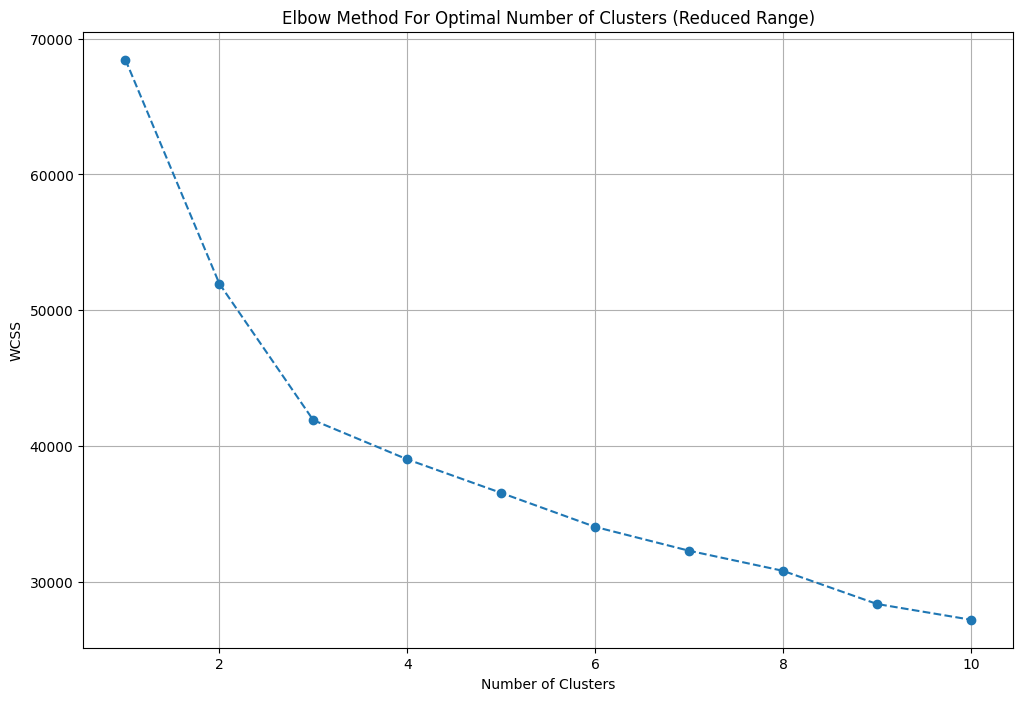

In [47]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [48]:
n_clusters = 3

# Fit the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_data)

# Predict the cluster assignments for each row
cluster_assignments = kmeans.predict(scaled_data)

In [49]:
df = train_df.iloc[:,:-18]
df['furnishing_type'] = cluster_assignments
df.sample(5)[['furnishDetails','furnishing_type']]
# 0 -> unfurnished
# 1 -> semifurnished
# 2 -> furnished

,furnishDetails,furnishing_type
940,"['5 AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",0
3122,NaN,0
330,"['1 Wardrobe', '1 Fan', '1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",0
3604,"['8 Fan', '8 Light', '1 Chimney', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",2
904,"['1 Water Purifier', '12 Fan', '1 Fridge', '1 Exhaust Fan', '1 Dining Table', '10 Geyser', '1 Stove', '40 Light', '1 Modular Kitchen', '10 TV', '1 Curtains', '15 AC', '1 Chimney', '10 Bed', '12 Wardrobe', '1 Sofa', '1 Washing Machine', '1 Microwave']",1


In [50]:
app_df=pd.read_csv("D:\\machine learning projecsts folders\\realstate\\appartments.csv")

In [51]:
app_df['PropertyName'] = app_df['PropertyName'].str.lower()

In [52]:
app_df['PropertyName'] = app_df['PropertyName'].str.lower()
temp_df = df[df['features'].isnull()]

In [53]:
x = temp_df.merge(app_df,left_on='society',right_on='PropertyName',how='left')['TopFacilities']
df.loc[temp_df.index,'features'] = x.values
df['features'].isnull().sum()

np.int64(481)

In [54]:
from sklearn.preprocessing import MultiLabelBinarizer
import ast
# Convert the string representation of lists in the 'features' column to actual lists
df['features_list'] = df['features'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x.startswith('[') else [])

# Use MultiLabelBinarizer to convert the features list into a binary matrix
mlb = MultiLabelBinarizer()
features_binary_matrix = mlb.fit_transform(df['features_list'])

# Convert the binary matrix into a DataFrame
features_binary_df = pd.DataFrame(features_binary_matrix, columns=mlb.classes_)

In [55]:
# Define the weights for each feature as provided
# Assigning weights based on perceived luxury contribution
weights = {
    '24/7 Power Backup': 8,
    '24/7 Water Supply': 4,
    '24x7 Security': 7,
    'ATM': 4,
    'Aerobics Centre': 6,
    'Airy Rooms': 8,
    'Amphitheatre': 7,
    'Badminton Court': 7,
    'Banquet Hall': 8,
    'Bar/Chill-Out Lounge': 9,
    'Barbecue': 7,
    'Basketball Court': 7,
    'Billiards': 7,
    'Bowling Alley': 8,
    'Business Lounge': 9,
    'CCTV Camera Security': 8,
    'Cafeteria': 6,
    'Car Parking': 6,
    'Card Room': 6,
    'Centrally Air Conditioned': 9,
    'Changing Area': 6,
    "Children's Play Area": 7,
    'Cigar Lounge': 9,
    'Clinic': 5,
    'Club House': 9,
    'Concierge Service': 9,
    'Conference room': 8,
    'Creche/Day care': 7,
    'Cricket Pitch': 7,
    'Doctor on Call': 6,
    'Earthquake Resistant': 5,
    'Entrance Lobby': 7,
    'False Ceiling Lighting': 6,
    'Feng Shui / Vaastu Compliant': 5,
    'Fire Fighting Systems': 8,
    'Fitness Centre / GYM': 8,
    'Flower Garden': 7,
    'Food Court': 6,
    'Foosball': 5,
    'Football': 7,
    'Fountain': 7,
    'Gated Community': 7,
    'Golf Course': 10,
    'Grocery Shop': 6,
    'Gymnasium': 8,
    'High Ceiling Height': 8,
    'High Speed Elevators': 8,
    'Infinity Pool': 9,
    'Intercom Facility': 7,
    'Internal Street Lights': 6,
    'Internet/wi-fi connectivity': 7,
    'Jacuzzi': 9,
    'Jogging Track': 7,
    'Landscape Garden': 8,
    'Laundry': 6,
    'Lawn Tennis Court': 8,
    'Library': 8,
    'Lounge': 8,
    'Low Density Society': 7,
    'Maintenance Staff': 6,
    'Manicured Garden': 7,
    'Medical Centre': 5,
    'Milk Booth': 4,
    'Mini Theatre': 9,
    'Multipurpose Court': 7,
    'Multipurpose Hall': 7,
    'Natural Light': 8,
    'Natural Pond': 7,
    'Park': 8,
    'Party Lawn': 8,
    'Piped Gas': 7,
    'Pool Table': 7,
    'Power Back up Lift': 8,
    'Private Garden / Terrace': 9,
    'Property Staff': 7,
    'RO System': 7,
    'Rain Water Harvesting': 7,
    'Reading Lounge': 8,
    'Restaurant': 8,
    'Salon': 8,
    'Sauna': 9,
    'Security / Fire Alarm': 9,
    'Security Personnel': 9,
    'Separate entry for servant room': 8,
    'Sewage Treatment Plant': 6,
    'Shopping Centre': 7,
    'Skating Rink': 7,
    'Solar Lighting': 6,
    'Solar Water Heating': 7,
    'Spa': 9,
    'Spacious Interiors': 9,
    'Squash Court': 8,
    'Steam Room': 9,
    'Sun Deck': 8,
    'Swimming Pool': 8,
    'Temple': 5,
    'Theatre': 9,
    'Toddler Pool': 7,
    'Valet Parking': 9,
    'Video Door Security': 9,
    'Visitor Parking': 7,
    'Water Softener Plant': 7,
    'Water Storage': 7,
    'Water purifier': 7,
    'Yoga/Meditation Area': 7
}
# Calculate luxury score for each row
luxury_score = features_binary_df[list(weights.keys())].multiply(list(weights.values())).sum(axis=1)

In [56]:
df['luxury_score'] = luxury_score

In [57]:
# cols to drop -> nearbyLocations,furnishDetails, features,features_list, additionalRoom
df.drop(columns=['nearbyLocations','furnishDetails','features','features_list'],inplace=True)
df.sample(5)

,property_type,society,sector,price,rate,area,areaWithType,bedRoom,bathroom,balcony,noOfFloor,facing,agePossession,super_built_up_area,built_up_area,Carpet area,others,pooja room,servant room,store room,study room,furnishing_type,luxury_score
96,House,NaN,sector 105,0.55,98214.0,56.0,Built Up area: 56 (5.2 sq.m.),4.0,4.0,No,2.0,NaN,Undefined,NaN,56.0,NaN,0,0,0,0,0,0,0
3264,Flat,godrej meridien,sector 106,3.20,16000.0,2000.0,Carpet area: 2002 (185.99 sq.m.),3.0,3.0,3+,6,NaN,Under Construction,NaN,NaN,2002.0,0,0,1,0,0,0,49
3024,Flat,dlf regal gardens,sector 90,1.25,7339.0,1703.0,Super Built up area 1703(158.21 sq.m.),3.0,3.0,3,28,North,Moderately Old,1703.0,NaN,NaN,0,0,1,0,0,0,38
1396,Flat,avl 36 gurgaon,sector 36a,0.65,8953.0,726.0,Super Built up area 726(67.45 sq.m.),2.0,2.0,2,7,NaN,Relatively New,726.0,NaN,NaN,0,0,0,0,0,0,89
2036,Flat,vatika gurgaon,sector 83,0.84,6746.0,1245.0,Super Built up area 1245(115.66 sq.m.),2.0,2.0,2,7,East,Moderately Old,1245.0,NaN,NaN,0,0,0,0,0,2,157


In [58]:
df.shape

(3803, 23)

In [59]:
df.sample()

,property_type,society,sector,price,rate,area,areaWithType,bedRoom,bathroom,balcony,noOfFloor,facing,agePossession,super_built_up_area,built_up_area,Carpet area,others,pooja room,servant room,store room,study room,furnishing_type,luxury_score
3680,Flat,pivotal devaan,sector 84,0.3,6666.0,450.0,Carpet area: 450 (41.81 sq.m.),1.0,1.0,1,14,NaN,New Property,NaN,NaN,450.0,0,0,0,0,0,2,22


In [60]:
df.to_csv('gurgaon_properties_cleaned_v2.csv',index=False)